# LLC Operating Window Simulator

In [1]:
from llc_sim import test_edge_cases
from pathlib import Path

from SEPOC2025.magnetics_and_rectifier import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import numpy as np


# Cores database file location
path = Path.cwd()  / "SEPOC2025\cores_shapes_params.ndjson" 


Vbus = 400
Vo = 100
n = Vbus / (2 * Vo)
#Iout = 4
#fo = 150e3
print(n)
#n = Vbus / (2 * Vo)
#Lmc = (1/fo)*300e-9 / (16*100e-12)
#Lm = Lmc*0.8
#k = 4
#Ls = Lm/k
#Cs = 1 / (fo**2 * 4 * np.pi**2 * Ls)




params = {
    'Rload': 100, 'Cs': 6.8e-9, 'Ls': 165e-6, 'Lm': 750e-6, 'n': n,
    'Co': 20e-6, 'Vbus': 420, 'fsw': 150000
}

SimCycles = 5000
TimeStep = 10e-9

OperatingPoints = { f"400V/100V@1.5A" }

if __name__ == "__main__":
    OperatingPoint = test_edge_cases(OperatingPoints, params, SimCycles, TimeStep, plot = False, show_table=True, tol=1, return_arrays=True)

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Joshua\AppData\Local\Temp\ipykernel_11848\1017947771.py:13: SyntaxWarning: invalid escape sequence '\c'
  path = Path.cwd()  / "SEPOC2025\cores_shapes_params.ndjson"


2.0

1 cases were successfully processed.

SIMULATION SUMMARY
╒═════════════╤══════════════════╕
│ Parameter   │ 400V/100V@1.5A   │
╞═════════════╪══════════════════╡
│ Po          │ 150.0 W          │
├─────────────┼──────────────────┤
│ VoutAVG     │ 99.6745          │
├─────────────┼──────────────────┤
│ fsw         │ 148.0742 kHz     │
├─────────────┼──────────────────┤
│ dt_max      │ 386.6861 ns      │
├─────────────┼──────────────────┤
│ dt_max(%)   │ 2.8629%          │
├─────────────┼──────────────────┤
│ IDSpk       │ 1.3774 A         │
├─────────────┼──────────────────┤
│ IDS_off     │ 0.4473 A         │
├─────────────┼──────────────────┤
│ IDSrms      │ 0.5915 A         │
├─────────────┼──────────────────┤
│ ID1rms      │ 1.0796 A         │
├─────────────┼──────────────────┤
│ ID1pk       │ 2.5868 A         │
├─────────────┼──────────────────┤
│ IRrms       │ 0.8361 A         │
├─────────────┼──────────────────┤
│ IRpk        │ 1.3604 A         │
├─────────────┼─────────────

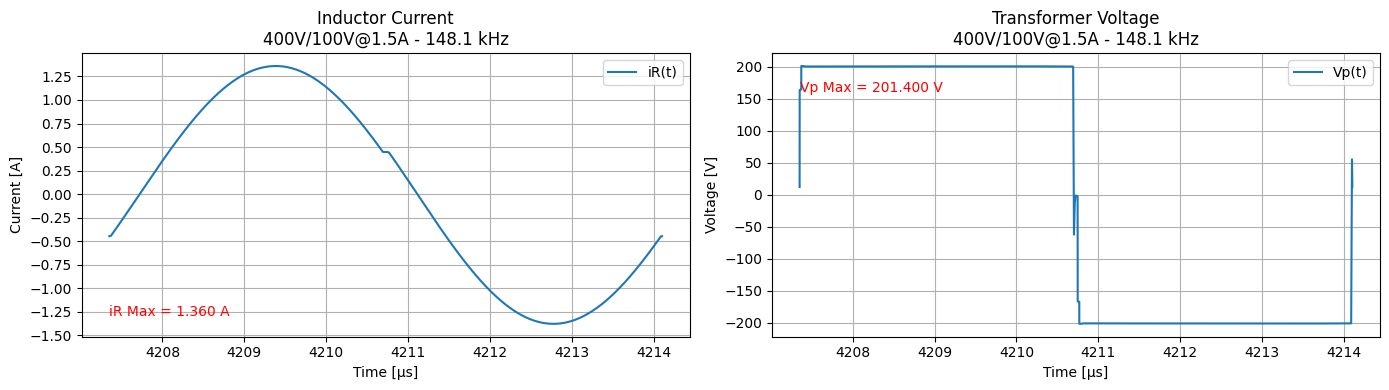

In [2]:
def microsec_formatter(x, pos):
    return f"{x * 1e6:.0f}"

for i, OP in enumerate(OperatingPoint):

    # Último ciclo
    start_idx = np.argmin(np.abs(OP['time'] - (OP['time'][-1] - 1/(OP['fsw_khz']*1e3))))

    PeriodTimeArray = OP['time'][start_idx:]
    
    
    # Corrente do indutor
    InductorCurrentArray = OP['iR'][start_idx:]
    InductorCurrentMax = np.max(InductorCurrentArray)

    # Tensão no primário do transformador
    TransformerVoltageArray = OP['vpri'][start_idx:]
    TransformerVoltageMax = np.max(TransformerVoltageArray)

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 linha, 2 colunas

    # Plot corrente no indutor
    axes[0].plot(PeriodTimeArray, InductorCurrentArray, label="iR(t)")
    axes[0].text(PeriodTimeArray[0], InductorCurrentMax * -0.95, f"iR Max = {InductorCurrentMax:.3f} A", fontsize=10, color="red")
    axes[0].set_title(f"Inductor Current\n{OP['case']} - {OP['fsw_khz']:.1f} kHz")
    axes[0].set_xlabel("Time [μs]")
    axes[0].set_ylabel("Current [A]")
    axes[0].grid(True)
    axes[0].yaxis.set_major_locator(MultipleLocator(0.25))
    axes[0].xaxis.set_major_locator(MultipleLocator(1e-6))
    axes[0].xaxis.set_major_formatter(FuncFormatter(microsec_formatter))
    axes[0].legend()

    # Plot tensão do primário
    axes[1].plot(PeriodTimeArray, TransformerVoltageArray, label="Vp(t)")
    axes[1].text(PeriodTimeArray[0], TransformerVoltageMax * 0.8, f"Vp Max = {TransformerVoltageMax:.3f} V", fontsize=10, color="red")
    axes[1].set_title(f"Transformer Voltage\n{OP['case']} - {OP['fsw_khz']:.1f} kHz")
    axes[1].set_xlabel("Time [μs]")
    axes[1].set_ylabel("Voltage [V]")
    axes[1].grid(True)
    axes[1].yaxis.set_major_locator(MultipleLocator(50))
    axes[1].xaxis.set_major_locator(MultipleLocator(1e-6))
    axes[1].xaxis.set_major_formatter(FuncFormatter(microsec_formatter))
    axes[1].legend()

    plt.tight_layout()
    plt.show()


Cores loaded: 55. Diodes loaded: 38.

                        Designs Comparison
      Parameter Transformer (FW) Transformer (FB)   Inductor
     Core Model         PQ 26/20         PQ 20/20   E 16/4.8
       Ae (mm²)            123.0             63.8       19.0
       Ve (mm³)           5490.0           2890.0      667.0
  Primary Turns               28               54         42
Secondary Turns               14               27           
  Pri Litz Wire       18 # 0.1mm       18 # 0.1mm 24 # 0.1mm
  Sec Litz Wire       24 # 0.1mm       33 # 0.1mm           
Window Fill (%)            71.37            88.29      89.87
                                                            
    Diode Model           FRS1JE           FRS1JE           
       Vmax (V)              600              600           
       Imax (A)                1                1           
     Cost (USD)          0.03232          0.03232           



                      Losses Table - Full-Wave (FW) Rectfier
O

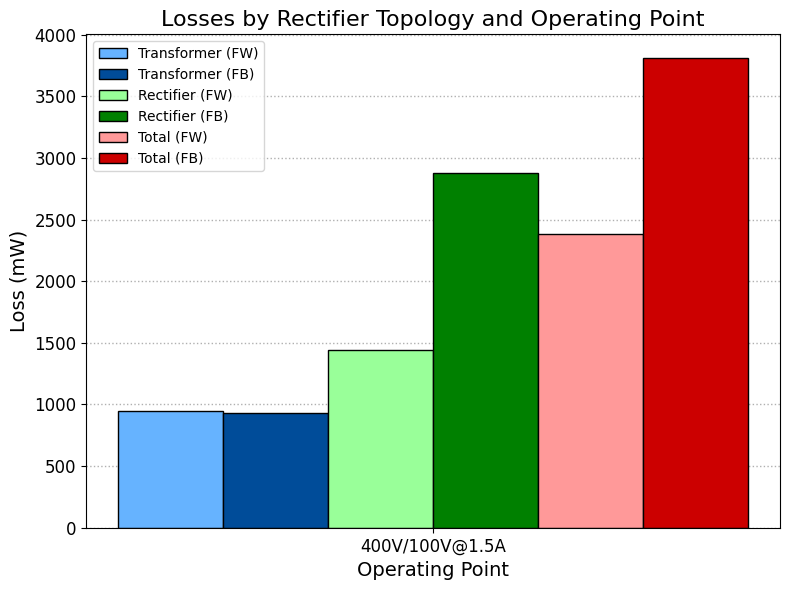

({'design': {'core': 'PQ 26/20',
   'Ve': 5.49e-06,
   'Ae': 0.000123,
   'Aw': 6.037499999999999e-05,
   'Ab': 1.9999999999999998e-05,
   'AeAw_req': np.float64(1.0589182036102e-09),
   'Np_turns': 28,
   'Ns_turns': 14,
   'd_strand': 0.0001,
   'Np_strands': 18,
   'Ns_strands': 24,
   'delta_skin': np.float64(0.0001694171391222201),
   'window_used': 4.3090706003884975e-05,
   'window_max': 5.433749999999999e-05,
   'St_p': np.float64(1.3934168097165421e-07),
   'St_s': np.float64(1.816704157744408e-07)},
  'losses': [{'case': '400V/100V@1.5A',
    'winding_loss_mw': np.float64(241.9379429858611),
    'core_loss_mw': np.float64(702.9341210868354),
    'rectifier_loss_mw': np.float64(1439.5508005044312),
    'total_loss_mw': np.float64(2384.4228645771277),
    'core_temp_c': np.float64(54.853247866652)}],
  'rectifier': {'Manufacturer': 'Diodes Incorporated',
   'Model/Name': 'FRS1JE',
   'Vendor Specific Code': '31-FRS1JETR-ND',
   'Vmax (V)': 600,
   'ImaxAVG (A)': 1,
   'Vf (Inom

In [3]:
designer = MagneticDesigner(path_to_db_folder="SEPOC2025")


transformer_design_params = {
    'n': params['n'],
    'Kw': 0.9,      
    'J': 6e6,        
    'Bmax': 0.1,      
    'diode_temp': 80,   
    'vd_margin': 1.15,     
    'id_margin': 1.15,     
    'sort_by': 'cost'     
}

inductor_design_params = {
    'Ls': params['Ls'],
    'Kw': 1,
    'J': 4.5e6,
    'Bmax': 0.28
}

designer.display_comparison_report(
    tr_params=transformer_design_params,
    ls_params=inductor_design_params,
    operating_points=OperatingPoint,
    TimeStep=TimeStep
)
